### 1. Transformada discreta de Fourier
#### 1.1. Grafique las siguientes señales lado a lado con su respectivo espectro en frecuencias
.
#### Señal senoidal

$$
Amplitud = 10 \\
$$
$$
f = 2Hz \\
$$
$$
f_s = 30Hz \\
$$
$$
N = 30 \\
$$
$$
\text{Densidad espectral de potencia} = \frac{A^2}{2} = \frac{100}{2} = 50 = 25 + 25
$$

Al graficar el espectro en frecuencia se observan los bins en frecuencia -2 y +2. Por otra parte, se ve que la densidad espectral de potencia calculada en el tiempo (de acuerdo a la fórmula para un seno), coincide con la calculada en base a la amplitud de los bins en frecuencia.

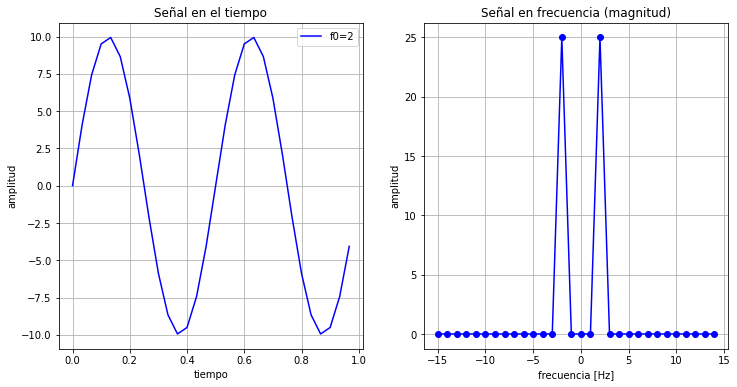

Densidad espectral de potencia = 50.0


In [3]:
import numpy as np
import scipy.signal as sci
import matplotlib.pyplot as plt

# onda senoidal
def sin_signal(fs, f0, amp, N, fase=0, n=None):
    """\
    fs:   frecuencia de sampleo [Hz]
    f0:   frecuencia de la senoidal [Hz]
    fase: fase de la señal [rad]
    amp:  amplitud de la señal [0 a 1]
    N:    cantidad de muestras
    n:    numero de muestra a retornar.
          Si es None devuelve todo el arreglo, caso contrario devuelve solamente
          el valor para el instante de tiempo correspondiente a esa muestra
    """
    if n is not None:
        return amp * np.sin(fase + 2 * np.pi * f0 * n * (1/fs))
    
    discrete_time = np.arange(0, N/fs, 1/fs)
    discrete_signal = amp * np.sin(fase + 2 * np.pi * f0 * discrete_time)
    
    return discrete_signal, discrete_time

def plot_time_and_freq(signal, time, fs, f0, N):

    signal_fft = np.fft.fft(signal)
    signal_fft = np.concatenate((signal_fft[N//2:N],signal_fft[0:N//2]))/N
    freq_fft = np.arange(-fs/2,fs/2,fs/N)
    #freq_fft = np.arange(0, fs, fs/N)

    fig = plt.figure(figsize=(12,6))
    fig.add_subplot(1, 2, 1)
    plt.plot(time, signal, 'b', label="f0={}".format(f0))
    plt.title("Señal en el tiempo")
    plt.xlabel("tiempo")
    plt.ylabel("amplitud")
    plt.legend()
    plt.grid()

    fig.add_subplot(1, 2, 2)
    plt.plot(freq_fft, np.abs(signal_fft)**2, 'b-o')
    plt.title("Señal en frecuencia (magnitud)")
    plt.xlabel("frecuencia [Hz]")
    plt.ylabel("amplitud")
    plt.grid()

    plt.show()
    
    return signal_fft


N    = 30
fs   = 30
amp  = 10
fase = 0
f0   = 2

sine_signal, sin_time = sin_signal(fs=fs, f0=f0, amp=amp, N=N, fase=fase)
sine_fft = plot_time_and_freq(signal=sine_signal, time=sin_time, fs=fs, f0=f0, N=N)
print("Densidad espectral de potencia = {}".format(sum(np.abs(sine_fft)**2)))


#### Señal cuadrada

$$
Amplitud = 10 \\
$$
$$
f = 2Hz \\
$$
$$
f_s = 30Hz \\
$$
$$
N = 60 \\
$$
$$
\text{Densidad espectral de potencia} \approx 100
$$


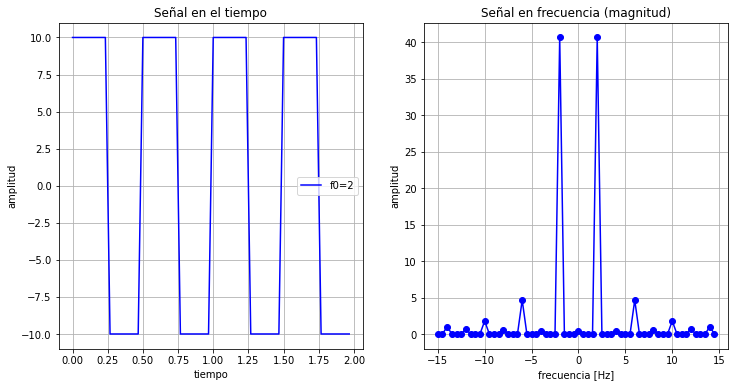

Densidad espectral de potencia = 99.99999999999997


In [4]:
# onda cuadrada
def square_signal(fs, f0, amp, N, fase=0, n=None):
    """\
    fs:   frecuencia de sampleo [Hz]
    f0:   frecuencia de la senoidal [Hz]
    fase: fase de la señal [rad]
    amp:  amplitud de la señal [0 a 1]
    N:    cantidad de muestras
    n:    numero de muestra a retornar.
          Si es None devuelve todo el arreglo, caso contrario devuelve solamente
          el valor para el instante de tiempo correspondiente a esa muestra
    """
    if n is not None:
        return amp * sci.square(fase + 2 * np.pi * f0 * n * (1/fs), duty=0.5)
    
    discrete_time = np.arange(0, N/fs, 1/fs)
    discrete_signal = amp * sci.square(fase + 2 * np.pi * f0 * discrete_time, duty=0.5)
    
    return discrete_signal, discrete_time

N    = 60
fs   = 30
amp  = 10
fase = 0
f0   = 2

sq_signal, sq_time = square_signal(fs=fs, f0=f0, amp=amp, N=N, fase=fase)
sq_fft = plot_time_and_freq(signal=sq_signal, time=sq_time, fs=fs, f0=f0, N=N)
print("Densidad espectral de potencia = {}".format(sum(np.abs(sq_fft)**2)))

#### Señal triangular

$$
Amplitud = 10 \\
$$
$$
f = 2Hz \\
$$
$$
f_s = 30Hz \\
$$
$$
N = 30 \\
$$
$$
\text{Densidad espectral de potencia} \approx 33
$$


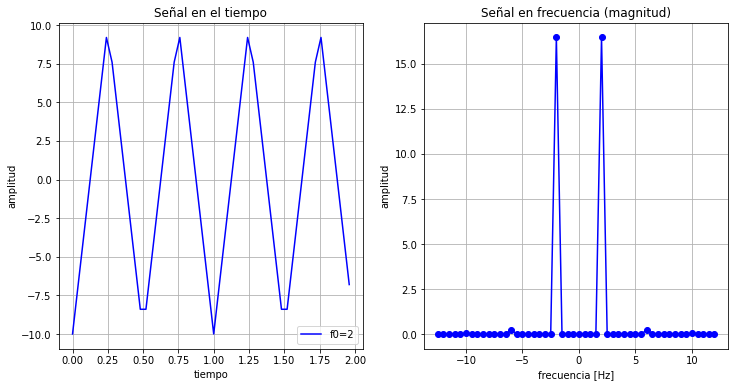

Densidad espectral de potencia = 33.43999999999999


In [5]:
# onda triangular
def tri_signal(fs, f0, amp, N, fase=0, n=None):
    """\
    fs:   frecuencia de sampleo [Hz]
    f0:   frecuencia de la senoidal [Hz]
    fase: fase de la señal [rad]
    amp:  amplitud de la señal [0 a 1]
    N:    cantidad de muestras
    n:    numero de muestra a retornar.
          Si es None devuelve todo el arreglo, caso contrario devuelve solamente
          el valor para el instante de tiempo correspondiente a esa muestra
    """
    if n is not None:
        return amp * sci.sawtooth(fase + 2 * np.pi * f0 * n * (1/fs), width=0.5)
    
    discrete_time = np.arange(0, N/fs, 1/fs)
    discrete_signal = amp * sci.sawtooth(fase + 2 * np.pi * f0 * discrete_time, width=0.5)
    
    return discrete_signal, discrete_time

N    = 50
fs   = 25
amp  = 10
fase = 0
f0   = 2

tr_signal, tr_time = tri_signal(fs=fs, f0=f0, amp=amp, N=N, fase=fase)
tr_fft = plot_time_and_freq(signal=tr_signal, time=tr_time, fs=fs, f0=f0, N=N)
print("Densidad espectral de potencia = {}".format(sum(np.abs(tr_fft)**2)))

#### Delta
Se puede ver que los bins en frecuencia se encuentran repartidos a lo largo de todo el espectro, cada uno de ellos con una amplitud muy baja.

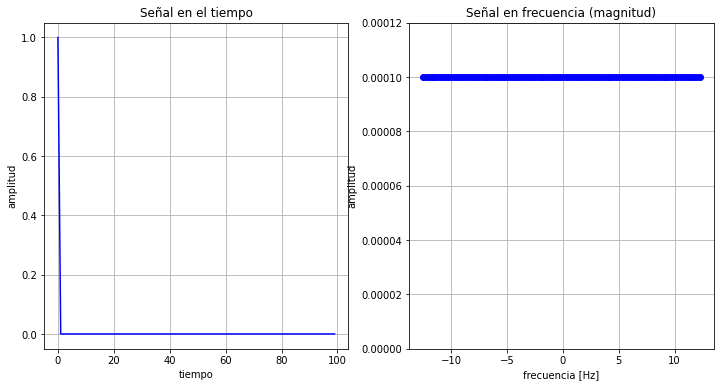

Densidad espectral de potencia = 0.009999999999999995


In [6]:
N = 100
delta = np.zeros(N)
delta[0] = 1
time = np.arange(0, N, 1)

signal_fft = np.fft.fft(delta)
signal_fft = np.concatenate((signal_fft[N//2:N],signal_fft[0:N//2]))/N
freq_fft = np.arange(-fs/2,fs/2,fs/N)

fig = plt.figure(figsize=(12,6))
fig.add_subplot(1, 2, 1)
plt.plot(time, delta, 'b')
plt.title("Señal en el tiempo")
plt.xlabel("tiempo")
plt.ylabel("amplitud")
plt.grid()

fig.add_subplot(1, 2, 2)
plt.plot(freq_fft, np.abs(signal_fft)**2, 'b-o')
plt.title("Señal en frecuencia (magnitud)")
plt.xlabel("frecuencia [Hz]")
plt.ylabel("amplitud")
plt.ylim([0, 0.00012])
plt.grid()

plt.show()

print("Densidad espectral de potencia = {}".format(sum(np.abs(signal_fft)**2)))

### 2. Transformada discreta de Fourier
.

$\text{Resolución espectral} = f_s / N = 200 / 100 = 2Hz$.

Se puede aplicar la técnica de zero padding, rellenando con ceros la señal, para así mejorar la resolución espectral, aunque a costa de tener una menor amplitud en los bins. Agregando 100 ceros, se logra una resolución espectral de 1Hz, pudiendo apreciar en el gráfico en frecuencia bins adicionales que antes no era posible observar.

Señal original


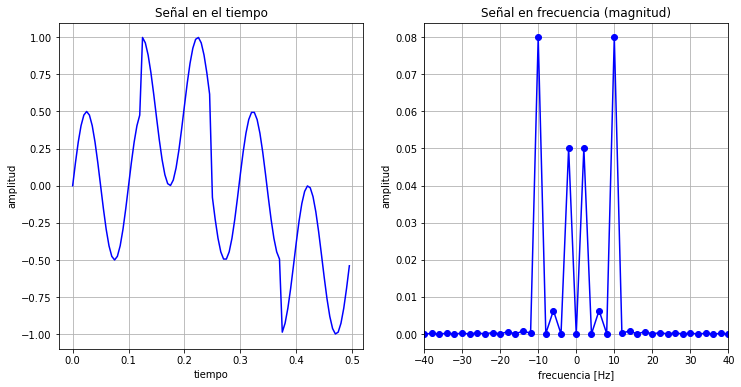

Señal con zero padding


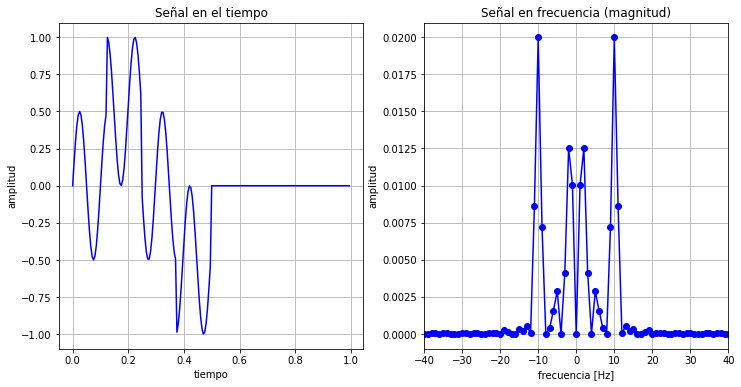

In [7]:
sequence_data = [ 0.00000000e+00,1.54508497e-01,2.93892626e-01,4.04508497e-01,4.75528258e-01,5.00000000e-01,4.75528258e-01,4.04508497e-01,2.93892626e-01,1.54508497e-01,1.83758918e-15,-1.54508497e-01,-2.93892626e-01,-4.04508497e-01,-4.75528258e-01,-5.00000000e-01,-4.75528258e-01,-4.04508497e-01,-2.93892626e-01,-1.54508497e-01,5.63708916e-15,1.54508497e-01,2.93892626e-01,4.04508497e-01,4.75528258e-01,9.98458667e-01,9.61939766e-01,8.80202983e-01,7.61249282e-01,6.16722682e-01,4.60770452e-01,3.08658284e-01,1.75275976e-01,7.36799178e-02,1.38150398e-02,1.54133313e-03,3.80602337e-02,1.19797017e-01,2.38750718e-01,3.83277318e-01,5.39229548e-01,6.91341716e-01,8.24724024e-01,9.26320082e-01,9.86184960e-01,9.98458667e-01,9.61939766e-01,8.80202983e-01,7.61249282e-01,6.16722682e-01,-7.82172325e-02,-2.26995250e-01,-3.53553391e-01,-4.45503262e-01,-4.93844170e-01,-4.93844170e-01,-4.45503262e-01,-3.53553391e-01,-2.26995250e-01,-7.82172325e-02,7.82172325e-02,2.26995250e-01,3.53553391e-01,4.45503262e-01,4.93844170e-01,4.93844170e-01,4.45503262e-01,3.53553391e-01,2.26995250e-01,7.82172325e-02,-7.82172325e-02,-2.26995250e-01,-3.53553391e-01,-4.45503262e-01,-4.93844170e-01,
-9.86184960e-01,-9.26320082e-01,-8.24724024e-01,-6.91341716e-01,-5.39229548e-01,-3.83277318e-01,-2.38750718e-01,-1.19797017e-01,
-3.80602337e-02,-1.54133313e-03,-1.38150398e-02,-7.36799178e-02,-1.75275976e-01,-3.08658284e-01,-4.60770452e-01,-6.16722682e-01,
-7.61249282e-01,-8.80202983e-01,-9.61939766e-01,-9.98458667e-01,-9.86184960e-01,-9.26320082e-01,-8.24724024e-01,-6.91341716e-01,
-5.39229548e-01]

sequence_data_np = np.array(sequence_data)

fs = 200
N = len(sequence_data_np) # 100
discrete_time = np.arange(0, N/fs, 1/fs)

signal_fft = np.fft.fft(sequence_data_np)
signal_fft = np.concatenate((signal_fft[N//2:N], signal_fft[0:N//2]))/N
freq_fft = np.arange(-fs/2,fs/2,fs/N)

print("Señal original")

fig = plt.figure(figsize=(12,6))
fig.add_subplot(1, 2, 1)
plt.plot(discrete_time, sequence_data_np, 'b')
plt.title("Señal en el tiempo")
plt.xlabel("tiempo")
plt.ylabel("amplitud")
plt.grid()

fig.add_subplot(1, 2, 2)
plt.plot(freq_fft, np.abs(signal_fft)**2, 'b-o')
plt.title("Señal en frecuencia (magnitud)")
plt.xlabel("frecuencia [Hz]")
plt.ylabel("amplitud")
plt.xlim([-40, 40])
plt.grid()

plt.show()


print("Señal con zero padding")
sequence_data.extend([0]*100)
sequence_data_np = np.array(sequence_data)
N_padding = len(sequence_data)

signal_fft = np.fft.fft(sequence_data_np)
signal_fft = np.concatenate((signal_fft[N_padding//2:N_padding], signal_fft[0:N_padding//2]))/N_padding
freq_fft = np.arange(-fs/2,fs/2,fs/N_padding)
discrete_time = np.arange(0, N_padding/fs, 1/fs)

fig = plt.figure(figsize=(12,6))
fig.add_subplot(1, 2, 1)
plt.plot(discrete_time, sequence_data_np, 'b')
plt.title("Señal en el tiempo")
plt.xlabel("tiempo")
plt.ylabel("amplitud")
plt.grid()

fig.add_subplot(1, 2, 2)
plt.plot(freq_fft, np.abs(signal_fft)**2, 'b-o')
plt.title("Señal en frecuencia (magnitud)")
plt.xlabel("frecuencia [Hz]")
plt.ylabel("amplitud")
plt.xlim([-40, 40])
plt.grid()

plt.show()


### 3. Antitransformada discreta de Fourier
.

Al graficar en 2 dimensiones la parte real e imaginaria, se observa que los datos corresponden a una imagen de Homero Simpson.


1000


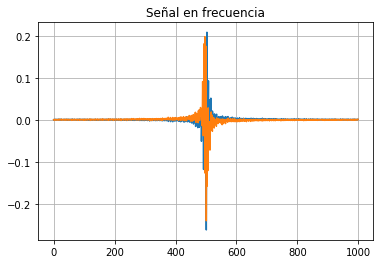

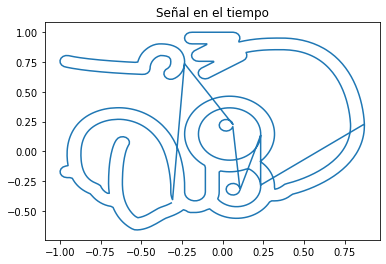

In [8]:
fft_hjs = np.load("fft_hjs.npy")
time_hjs = np.fft.ifft(fft_hjs)

N = len(fft_hjs)
print(len(fft_hjs))

fft_hjs_plot = np.concatenate((fft_hjs[N//2:N], fft_hjs[0:N//2]))/N
plt.plot(np.arange(0, N, 1), np.real(fft_hjs_plot))
plt.plot(np.arange(0, N, 1), np.imag(fft_hjs_plot))
plt.title("Señal en frecuencia")
plt.grid()
plt.show()

plt.plot(np.real(time_hjs), np.imag(time_hjs))
plt.title("Señal en el tiempo")
plt.show()



### 4. Convolución
.

Al reproducir el audio orina, se escucha al Chapulín Colorado decir "no contaban con mi astucia", pero también se tiene un pitido superpuesto con la voz.
Se diseña un filtro con una frecuencia de corte en 1500, determinando ese valor en base a lo observado en el gráfico del espectro de la señal original. Al filtrar la señal mediante una convolución y graficarla nuevamente, se puede observar que todo el ruido de alta frecuencia desaparece. Al reproducir nuevamente el audio ya filtrado, se escucha solamente la voz, sin el pitido del audio original.
Si se continúa disminuyendo la frecuencia de corte, se van perdiendo cada vez más componentes en frecuencia y la voz se escucha cada vez más baja hasta finalmente hacerse imperceptible.

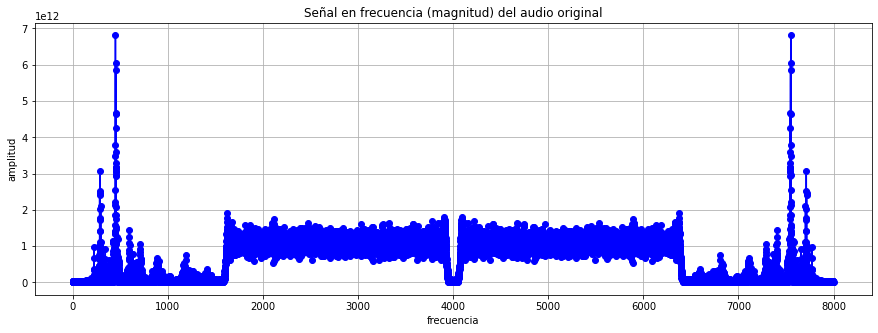

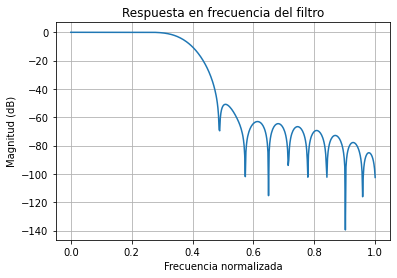

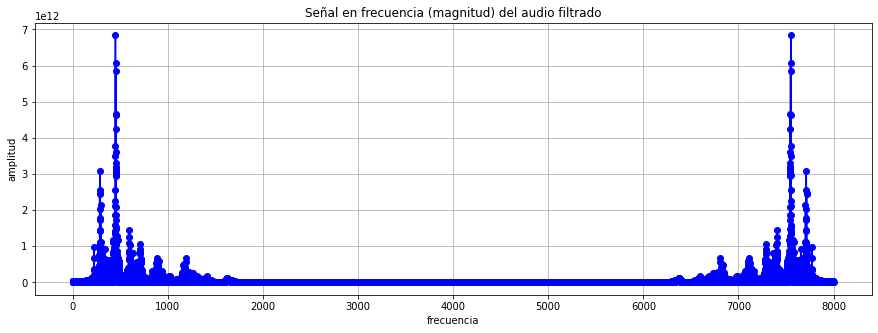

In [62]:
import scipy.signal as signal
import simpleaudio as sa

original_audio = np.load("chapu_noise.npy")

fs = 8000
N = len(original_audio)

# reproduccion del audio original
audio_to_reproduce = original_audio.astype(np.int16) # "no contaban con mi astucia"
play_obj = sa.play_buffer(audio_to_reproduce, 1, 2, fs)
play_obj.wait_done()

# espectro en frecuencia del audio original
original_audio_fft = np.fft.fft(original_audio)
freq_fft = np.arange(0,fs,fs/N)

fig = plt.figure(figsize=(15,5))
plt.plot(freq_fft, np.abs(original_audio_fft)**2, 'b-o')
plt.title("Señal en frecuencia (magnitud) del audio original")
plt.xlabel("frecuencia")
plt.ylabel("amplitud")
plt.grid()
plt.show()

# diseño de filtro - aparecieron varios problemas al tratar de correr pyfda,
# por lo que se recurre a las funciones de diseño de filtros de numpy
filter_taps = signal.firwin(numtaps=32, cutoff=1500, fs=8000)
# grafico la magnitud de la respuesta en frecuencia del filtro
w, h = signal.freqz(filter_taps, 1)
h_db = 20 * np.log10(abs(h))
plt.plot(w/max(w), h_db)
plt.ylabel('Magnitud (dB)')
plt.xlabel('Frecuencia normalizada')
plt.title('Respuesta en frecuencia del filtro')
plt.grid()


# filtrado de la señal
filtered_audio = signal.convolve(in1=original_audio, in2=filter_taps, mode="same")

# espectro en frecuencia del audio filtrado
filtered_audio_fft = np.fft.fft(filtered_audio)
freq_fft = np.arange(0,fs,fs/N)

fig = plt.figure(figsize=(15,5))
plt.plot(freq_fft, np.abs(filtered_audio_fft)**2, 'b-o')
plt.title("Señal en frecuencia (magnitud) del audio filtrado")
plt.xlabel("frecuencia")
plt.ylabel("amplitud")
plt.grid()
plt.show()

# reproduccion del audio filtrado
filtered_audio_to_reproduce = filtered_audio.astype(np.int16) # "no contaban con mi astucia"
play_obj = sa.play_buffer(filtered_audio_to_reproduce, 1, 2, fs)
play_obj.wait_done()